In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl

# performance evaluation with confusion matrix, accuracy and f1 score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [3]:
# Loading model to compare the results
model_xgb = pkl.load(open('../models/model_xgb.pkl','rb'))
model_rf = pkl.load(open('../models/model_rf.pkl','rb'))
model_lr = pkl.load(open('../models/model_lr.pkl','rb'))
model_dt = pkl.load(open('../models/model_dt.pkl','rb'))
model_knn = pkl.load(open('../models/model_knn.pkl','rb'))
model_lgbm = pkl.load(open('../models/model_clf.pkl','rb'))

# Loading scaler
sc = pkl.load(open('../models/processers/scaler.pkl','rb'))

In [4]:
#Reading test dataset
test_data = r'..\data\processed\split_data\test.csv'
df_test = pd.read_csv(test_data)

In [5]:
X_test = df_test.drop('Class', axis=1)
y_test = df_test['Class']

In [6]:
X_test = sc.transform(X_test)

In [7]:
# we feed the x_test values and store the predicted y values
xgb_ypred = model_xgb.predict(X_test)
rf_ypred = model_rf.predict(X_test)
lr_ypred = model_lr.predict(X_test)
dt_ypred = model_dt.predict(X_test)
knn_ypred = model_knn.predict(X_test)
lgbm_ypred = model_lgbm.predict(X_test)

C:\Users\ishan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\ishan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\ishan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\ishan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [8]:
# k-nearest neighbor
rf_cm = confusion_matrix(y_test, rf_ypred, labels = [0, 1])
xgb_cm = confusion_matrix(y_test, xgb_ypred, labels = [0, 1])
lr_cm = confusion_matrix(y_test, lr_ypred, labels = [0, 1])
dt_cm = confusion_matrix(y_test, dt_ypred, labels = [0, 1])
knn_cm = confusion_matrix(y_test, knn_ypred, labels = [0, 1])
lgbm_cm = confusion_matrix(y_test, lgbm_ypred, labels = [0, 1])

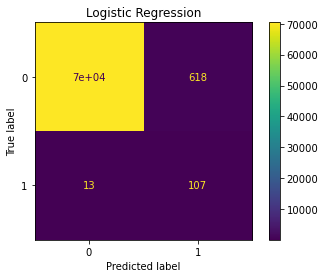

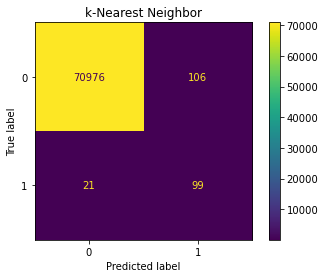

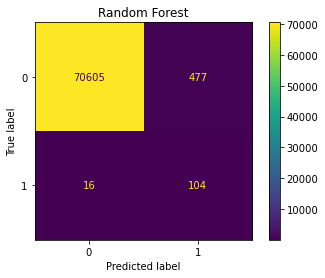

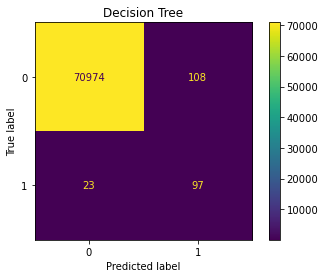

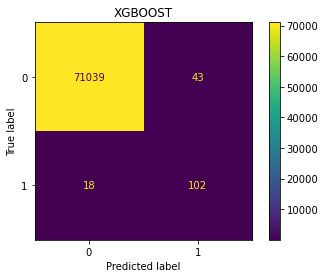

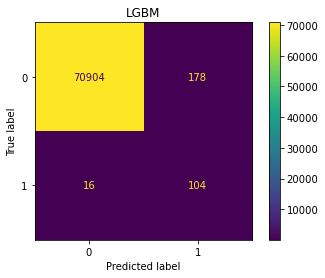

In [9]:
disp = ConfusionMatrixDisplay(lr_cm)
disp.plot()
plt.title("Logistic Regression")
plt.show()

disp = ConfusionMatrixDisplay(knn_cm)
disp.plot()
plt.title("k-Nearest Neighbor")
plt.show()

disp = ConfusionMatrixDisplay(rf_cm)
disp.plot()
plt.title("Random Forest")
plt.show()

disp = ConfusionMatrixDisplay(dt_cm)
disp.plot()
plt.title("Decision Tree")
plt.show()

disp = ConfusionMatrixDisplay(xgb_cm)
disp.plot()
plt.title("XGBOOST")
plt.show()

disp = ConfusionMatrixDisplay(lgbm_cm)
disp.plot()
plt.title("LGBM")
plt.show()

In [48]:
pip install prettytable

Note: you may need to restart the kernel to use updated packages.


In [12]:
from prettytable import PrettyTable

# Specify the Column Names while initializing the Table
myTable = PrettyTable(["Model", "Accuracy (%)", "Precision (%)", "Recall (%)", "F1 Score (%)"])

# Add rows
myTable.add_row(["Logistic Regression", round(accuracy_score(y_test, lr_ypred)*100, 4), round(precision_score(y_test, lr_ypred)*100, 4), round(recall_score(y_test, lr_ypred)*100, 4), round(f1_score(y_test, lr_ypred)*100, 4)])
myTable.add_row(["k-Nearest Neighbor", round(accuracy_score(y_test, knn_ypred)*100, 4), round(precision_score(y_test, knn_ypred)*100, 4), round(recall_score(y_test, knn_ypred)*100, 4), round(f1_score(y_test, knn_ypred)*100, 4)])
myTable.add_row(["Random Forest", round(accuracy_score(y_test, rf_ypred)*100, 4), round(precision_score(y_test, rf_ypred)*100, 4), round(recall_score(y_test, rf_ypred)*100, 4), round(f1_score(y_test, rf_ypred)*100, 4)])
myTable.add_row(["Decision Tree", round(accuracy_score(y_test, dt_ypred)*100, 4), round(precision_score(y_test, dt_ypred)*100, 4), round(recall_score(y_test, dt_ypred)*100, 4), round(f1_score(y_test, dt_ypred)*100, 4)])
myTable.add_row(["XGBOOST", round(accuracy_score(y_test, xgb_ypred)*100, 4), round(precision_score(y_test, xgb_ypred)*100, 4), round(recall_score(y_test, xgb_ypred)*100, 4), round(f1_score(y_test, xgb_ypred)*100, 4)])
myTable.add_row(["LGBM", round(accuracy_score(y_test, lgbm_ypred)*100, 4), round(precision_score(y_test, lgbm_ypred)*100, 4), round(recall_score(y_test, lgbm_ypred)*100, 4), round(f1_score(y_test, lgbm_ypred)*100, 4)])

print(myTable)


+---------------------+--------------+---------------+------------+--------------+
|        Model        | Accuracy (%) | Precision (%) | Recall (%) | F1 Score (%) |
+---------------------+--------------+---------------+------------+--------------+
| Logistic Regression |   99.1138    |    14.7586    |  89.1667   |   25.3254    |
|  k-Nearest Neighbor |   99.8216    |    48.2927    |    82.5    |   60.9231    |
|    Random Forest    |   99.3076    |    17.9002    |  86.6667   |   29.6719    |
|    Decision Tree    |    99.816    |    47.3171    |  80.8333   |   59.6923    |
|       XGBOOST       |   99.9143    |    70.3448    |    85.0    |   76.9811    |
|         LGBM        |   99.7275    |    36.8794    |  86.6667   |   51.7413    |
+---------------------+--------------+---------------+------------+--------------+
